In [ ]:
using Revise, Distributed
addprocs(44);

In [ ]:
# ### Fitting a choice model
# Blah blah blah

using pulse_input_DDM

In [ ]:
using JLD2
JLD2.@load "mydata.jld2"

In [ ]:
# ### Geneerate some data
# Blah blah blah


#parameters of the latent model
#pz = Dict("generative" => vcat(1.,13.,-0.5,10.,1.,0.4,0.02), 
#    "name" => vcat("σ_i","B", "λ", "σ_a","σ_s","ϕ","τ_ϕ"),
#    "fit" => vcat(trues(7)),
#    "initial" => vcat(2.,15.,-5.,100.,2.,0.2,0.005),
#    "lb" => [eps(), 4., -5., eps(), eps(), eps(), eps()],
#    "ub" => [10., 100, 5., 800., 40., 2., 10.])

#parameters for the choice observation
#pd = Dict("generative" => vcat(0.1,0.1), 
#    "initial" => vcat(0.,0.5));

options = opt(lb=vcat([eps(), 4., -5., eps(), eps(), eps(), eps()],[-30,0.]),
    ub=vcat([10., 100, 5., 800., 40., 2., 10.],[30,1.]),
    x0=vcat([1.,13.,-0.5,50.,1.,0.4,0.01],[0.1,0.1]),
    fit=vcat(trues(9)))

In [ ]:
θ_syn = θchoice(θz=θz(σ2_i=1.,B=13.,λ=-0.5,σ2_a=50.,σ2_s=1.,ϕ=0.4,τ_ϕ=0.01), bias=0.1, lapse=0.1)
θ_syn, data = synthetic_data(;θ=θ_syn,ntrials=20000,rng=2)

# ### Optimize stuff
# Blah blah blah

model, options = optimize(data;options=options,iterations=80)

In [ ]:
gradient(model,options)

In [ ]:
# ### Compute Hessian
# Blah blah blah

H = Hessian(model)

In [ ]:
CI = CIs(model, H)

In [ ]:
model.θ.θz

In [ ]:
θ_syn = θchoice(θz=θz(σ2_i=1.,B=13.,λ=-0.5,σ2_a=50.,σ2_s=1.,ϕ=0.4,τ_ϕ=0.01), bias=0.1, lapse=0.1)
θ_syn, data = synthetic_data(;θ=θ_syn,ntrials=20000,rng=2)

# ### Optimize stuff
# Blah blah blah

model, options = optimize(data;options=options,iterations=80)

In [ ]:
# ### Compute Hessian
# Blah blah blah

H = Hessian(model)

In [ ]:
model = choiceDDM(θ,data)
pulse_input_DDM.gradient(model,53)

In [ ]:
# ### Get the CIs from the Hessian
# Blah blah blah

CI = CIs(model, H)

In [ ]:
using Flatten
using ForwardDiff

In [ ]:
@unpack θ, data = model
x = [Flatten.flatten(θ)...]
ℓℓ(x) = -loglikelihood(x, data, n)

In [ ]:
ForwardDiff.gradient(ℓℓ, x)


In [ ]:
eigvals(H)

In [ ]:
using PositiveFactorizations

In [ ]:
HPSD = Matrix(cholesky(Positive, H, Val{false}))

In [ ]:
eigvals(H)

In [ ]:
eigvals(HPSD)

In [ ]:
eigvecs(H)

In [ ]:
model.θ.θz

In [ ]:
model.θ.θz

In [ ]:
θ_syn.θz

In [ ]:
using JLD2
JLD2.@save "mydata2.jld2" data

In [ ]:
using JLD2
JLD2.@load "mydata2.jld2"

In [ ]:
data

In [ ]:
nT

In [ ]:
@unpack binned_clicks,choices = data

In [ ]:
using Parameters
@unpack clicks,nT,nL,nR,dt,centered = binned_clicks

In [ ]:
@unpack L,R,T,ntrials = clicks

In [ ]:
gradient(model,options)

In [ ]:
gradient(model,options)

In [ ]:
gradient(model,options)

In [ ]:
options

In [1]:
using pulse_input_DDM
using PyPlot
using Parameters

┌ Info: Precompiling pulse_input_DDM [c2542da2-1f7d-11e9-2506-87691095ebb2]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **



In [2]:
θ, data = synthetic_data(ntrials = 50)

(θchoice{θz{Float64},Float64}
  θz: θz{Float64}
  bias: Float64 0.0
  lapse: Float64 0.01
, choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}[choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}
  click_data: pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}
  choice: Bool false
  sessbnd: Bool false
, choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}
  click_data: pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}
  choice: Bool false
  sessbnd: Bool false
, choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}
  click_data: pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}
  choice: Bool false
  sessbnd: Bool false
, choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}
  click

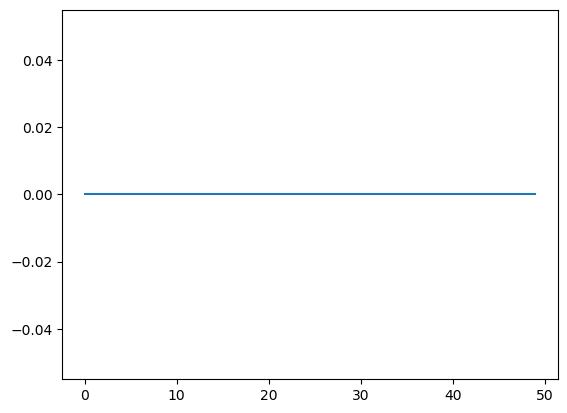

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149bf44d0>

In [3]:
sessbnd = map(data->data.sessbnd,data)
plot(sessbnd)

In [4]:
a,b = filter(x -> x == 1, sessbnd)


BoundsError: BoundsError: attempt to access 0-element Array{Bool,1} at index [1]

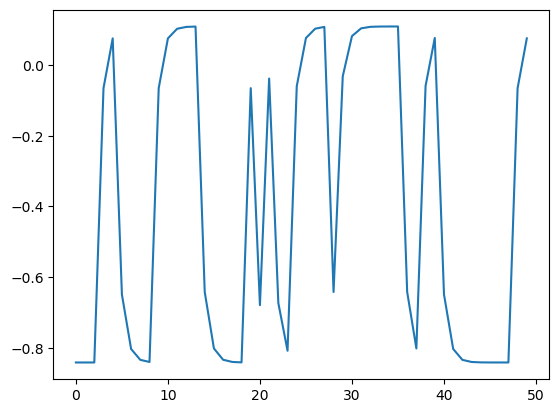

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149e418d0>

In [5]:
@unpack ibias, eta, beta, scaling = θ.θz
clickdata = map(data->data.click_data,data)
sessbnd = map(data->data.sessbnd,data)

i_0 = pulse_input_DDM.compute_initial_pt(ibias,eta,beta,scaling,clickdata, sessbnd)
plot(i_0[1:50])

In [6]:
n = 53;

options = choiceoptions(fit = vcat(false,true,true, true, true, true, true, true, true, true, true, true, true),
    lb = vcat([0., 0., 0., 0, 2., -5., 0., 1., 0.01, 0.005, 0.], [-30, 0.]),
    ub = vcat([2., 1., 1., 1., 60., 5., 100., 8, 1.2, 1., 5.], [30, 0.2]),
    x0 = vcat([eps(), 0.3014, 0.9664, 0.3570, 15.89798, 0.210063, 1e-10, 2.54713, 0.182666, 0.0232964, 2.], [0., 0.07]))

choiceoptions
  fit: Array{Bool}((13,)) Bool[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  lb: Array{Float64}((13,)) [0.0, 0.0, 0.0, 0.0, 2.0, -5.0, 0.0, 1.0, 0.01, 0.005, 0.0, -30.0, 0.0]
  ub: Array{Float64}((13,)) [2.0, 1.0, 1.0, 1.0, 60.0, 5.0, 100.0, 8.0, 1.2, 1.0, 5.0, 30.0, 0.2]
  x0: Array{Float64}((13,)) [2.220446049250313e-16, 0.3014, 0.9664, 0.357, 15.89798, 0.210063, 1.0e-10, 2.54713, 0.182666, 0.0232964, 2.0, 0.0, 0.07]


In [8]:
model, = optimize(data, options, n; iterations=100, outer_iterations=1)


Fminbox
-------
Initial mu = 1.35983e-11

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 1.35983e-11

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     2.411352e+01     8.297904e+01
 * time: 3.314018249511719e-5
     1     2.408855e+01     1.633877e+02
 * time: 1.1122260093688965
     2     2.354237e+01     3.889398e+01
 * time: 4.036880016326904
     3     2.297308e+01     4.507722e+01
 * time: 5.207273960113525
     4     2.294565e+01     4.509034e+01
 * time: 6.3667731285095215
     5     2.294434e+01     4.506596e+01
 * time: 7.511276006698608
     6     2.294434e+01     4.506589e+01
 * time: 8.744359016418457
     7     2.294432e+01     4.506546e+01
 * time: 9.996330976486206
     8     2.294430e+01     4.506513e+01
 * time: 11.221029996871948
     9     2.271393e+01     4.067799e+01
 * time: 12.338413000106812
    10     2.269948e+01     4.042395e+01
 * time: 13.602954149246216
    11     2.269185e+01     4

(choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((50,))
,  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [1.29e-01, 9.96e-01, 2.81e-01,  ...]
    Minimum:   2.129862e+01

 * Found with
    Algorithm:     Fminbox with BFGS
    Initial Point: [3.01e-01, 9.66e-01, 3.57e-01,  ...]

 * Convergence measures
    |x - x'|               = 2.80e+00 ≰ 1.0e-12
    |x - x'|/|x'|          = 1.74e-01 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.81e+00 ≰ 1.0e-12
    |f(x) - f(x')|/|f(x')| = 1.32e-01 ≰ 0.0e+00
    |g(x)|                 = 4.29e+00 ≰ 1.0e-10

 * Work counters
    Seconds run:   135  (vs limit Inf)
    Iterations:    1
    f(x) calls:    1368
    ∇f(x) calls:   101
)

In [9]:
using Distributions

In [ ]:
reg = Gamma(2., 1.)
log(pdf.(reg, 1. - ibias - (eta*beta/(1. - beta))))

In [ ]:
@unpack ibias, eta, beta = θ.θz
clickdata = map(data->data.click_data,data)
i_0 = pulse_input_DDM.compute_initial_pt(0.,eta,beta,clickdata)

In [ ]:
plot(i_0)

In [ ]:
θ, data = synthetic_data(ntrials = 500)
ll = loglikelihood(θ, data,n)

In [ ]:
 # not respecting session boundaries yet
ΔLR = pulse_input_DDM.diffLR.(clickdata)
correct = map(ΔLR->sign(ΔLR),ΔLR)

In [23]:
using Distributions
using PyPlot

In [21]:
reg = InverseGamma(0.001, 0.1)
ep = 0.0001344

0.0001344

In [52]:
c = log(pdf.(reg, ep))

-742.0421766485829

In [53]:
m = -(log(pdf.(reg, ep)) - log(pdf.(reg,2*ep)))/ep

2.762936385019056e6

In [60]:
x = collect(-ep:ep:ep)
χ = collect(ep:ep:2*ep)

y = m.*(x .- ep) .+ c
z = log.(pdf.(reg,χ))

2-element Array{Float64,1}:
 -742.0421766485829
 -370.7035265020218

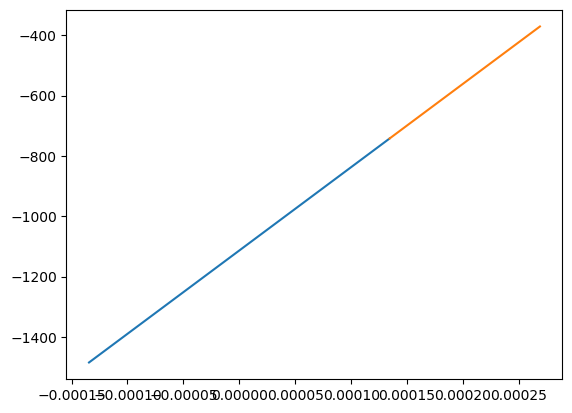

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14eb79c90>

In [61]:
plot(x,y)
plot(χ,z)

In [56]:
ibias = 1
eta = 1
beta = 0.1
reg = InverseGamma(0.001, 0.1);

    ep = 0.0001344
    dum = 1. - ibias - (eta*beta/(1. - beta)) 
dum_slope = -(log(pdf.(reg, ep)) - log(pdf.(reg,2*ep)))/ep

2.762936385019056e6

In [57]:
dum_intercept = log(pdf.(reg, ep))
(dum_slope*(dum-ep) + dum_intercept)

-308106.3124955792

In [62]:
80000*log(0.5)

-55451.77444479562

In [63]:
1.7*1.7

2.8899999999999997